# Compare WG Simulated, Contiguous Dry Days to Data

In [1]:
%matplotlib inline

In [2]:
import os
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as sstats
import datetime as dt
import sqlalchemy
import seaborn as sns

In [3]:
# all months for prism
PRISM_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochas' \
           r'tic_CC_Recharge\Data\JNotes\Processed\PRISM\DryDays_1981-2010.pickle'
WG_IN_DIR = r'C:\Temp\WG_Test_Out\Test2\Processed'
OUT_DIR = r'C:\Temp\WG_Test_Out\Test2\Processed\Comparison'
OUT_ROOT = "DC_WGMN2"
H0_ROOT = "H0_Data_DryDays_G"

In [4]:
LOCA_KEYS = [ 62, 63, 64, 76, 77, 78, 79, 90, 91, 92, 93, 94,
              104, 105, 106, 107, 108, 120, 121, 122, 123, 137 ]
NUM_LOCA_GRID = len( LOCA_KEYS )

Load all PRISM

In [5]:
PRAllDF = pd.read_pickle( PRISM_IN )

In [6]:
display( HTML( PRAllDF.head().to_html() ) )

,Grid_Id,Year,Month,Day,Dry_Count
0,662328,1981,1,1,5
1,662328,1981,1,7,2
2,662328,1981,1,10,1
3,662328,1981,1,12,2
4,662328,1981,1,15,2


In [7]:
display( HTML( PRAllDF.describe().to_html() ) )

,Grid_Id,Year,Month,Day,Dry_Count
count,226400.000000,226400.000000,226400.000000,226400.000000,226400.000000
mean,671315.758852,1995.396285,6.328542,15.697147,8.234337
std,5668.010898,8.712877,3.251778,8.947034,9.193535
min,662328.000000,1981.000000,1.000000,1.000000,1.000000
25%,666548.000000,1988.000000,4.000000,8.000000,2.000000
50%,670770.000000,1995.000000,6.000000,15.000000,5.000000
75%,676383.000000,2003.000000,9.000000,24.000000,10.000000
max,680607.000000,2010.000000,12.000000,31.000000,122.000000


Next load all grid cells and concatenate from the WG

In [8]:
DFList = list()

In [9]:
for gG in LOCA_KEYS:
    cFile = "%s%d.pickle" % ( H0_ROOT, gG )
    InFP = os.path.normpath( os.path.join( WG_IN_DIR, cFile ) )
    cDF = pd.read_pickle( InFP )
    DFList.append( cDF )
# end of for

Now concatenate

In [10]:
NumDF = len( DFList )
NumDF

22

In [11]:
H0DDDF = pd.concat( DFList, ignore_index=True )

In [12]:
display( HTML( H0DDDF.head().to_html() ) )

,Year,Month,Day,Dry_Count
0,1980,1,1,4
1,1980,1,8,30
2,1980,2,10,3
3,1980,2,15,14
4,1980,3,2,3


In [13]:
display( HTML( H0DDDF.describe().to_html() ) )

,Year,Month,Day,Dry_Count
count,2.376205e+08,2.376205e+08,2.376205e+08,2.376205e+08
mean,1.994983e+03,6.371162e+00,1.571779e+01,8.340808e+00
std,8.950637e+00,3.287197e+00,8.805253e+00,7.963439e+00
min,1.980000e+03,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.987000e+03,4.000000e+00,8.000000e+00,3.000000e+00
50%,1.995000e+03,6.000000e+00,1.600000e+01,6.000000e+00
75%,2.003000e+03,9.000000e+00,2.300000e+01,1.100000e+01
max,2.010000e+03,1.200000e+01,3.100000e+01,1.450000e+02


Can now drop some columns

In [14]:
H0DDDF.drop( columns=['Year', 'Day'], inplace=True )
PRAllDF.drop( columns=['Grid_Id', 'Year', 'Day'], inplace=True )

In [15]:
display(HTML( PRAllDF.head().to_html()))

,Month,Dry_Count
0,1,5
1,1,2
2,1,1
3,1,2
4,1,2


In [16]:
display(HTML( H0DDDF.head().to_html()))

,Month,Dry_Count
0,1,4
1,1,30
2,2,3
3,2,14
4,3,3


Now filter all into monthly values

In [17]:
PRJanDF = PRAllDF[PRAllDF['Month'] == 1].copy()
PRFebDF = PRAllDF[PRAllDF['Month'] == 2].copy()
PRMarDF = PRAllDF[PRAllDF['Month'] == 3].copy()
PRAprDF = PRAllDF[PRAllDF['Month'] == 4].copy()
PRMayDF = PRAllDF[PRAllDF['Month'] == 5].copy()
PRJunDF = PRAllDF[PRAllDF['Month'] == 6].copy()
PRJulDF = PRAllDF[PRAllDF['Month'] == 7].copy()
PRAugDF = PRAllDF[PRAllDF['Month'] == 8].copy()
PRSepDF = PRAllDF[PRAllDF['Month'] == 9].copy()
PROctDF = PRAllDF[PRAllDF['Month'] == 10].copy()
PRNovDF = PRAllDF[PRAllDF['Month'] == 11].copy()
PRDecDF = PRAllDF[PRAllDF['Month'] == 12].copy()

In [18]:
H0JanDF = H0DDDF[H0DDDF['Month'] == 1].copy()
H0FebDF = H0DDDF[H0DDDF['Month'] == 2].copy()
H0MarDF = H0DDDF[H0DDDF['Month'] == 3].copy()
H0AprDF = H0DDDF[H0DDDF['Month'] == 4].copy()
H0MayDF = H0DDDF[H0DDDF['Month'] == 5].copy()
H0JunDF = H0DDDF[H0DDDF['Month'] == 6].copy()
H0JulDF = H0DDDF[H0DDDF['Month'] == 7].copy()
H0AugDF = H0DDDF[H0DDDF['Month'] == 8].copy()
H0SepDF = H0DDDF[H0DDDF['Month'] == 9].copy()
H0OctDF = H0DDDF[H0DDDF['Month'] == 10].copy()
H0NovDF = H0DDDF[H0DDDF['Month'] == 11].copy()
H0DecDF = H0DDDF[H0DDDF['Month'] == 12].copy()

In [19]:
MonthLister = [ "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", 
                 "Sep", "Oct", "Nov", "Dec", "All" ]
AveLister = list()
VarLister = list()
SkewLister = list()
KurtLister = list()
PLister = list()
NLister = list()
CntLister = list()
MedianLister = list()
MaxLister = list()
MinLister = list()

In [20]:
OurQs = np.array( [ round( 0.01 * x, 2 ) for x in range(101) ], dtype=np.float32 )
NumQs = len( OurQs )
NumQs

101

## Jan

First get our overall tracking values

In [21]:
AveLister.append( [ PRJanDF['Dry_Count'].mean(), H0JanDF['Dry_Count'].mean() ] )
VarLister.append( [ PRJanDF['Dry_Count'].var(), H0JanDF['Dry_Count'].var() ] )
SkewLister.append( [ PRJanDF['Dry_Count'].skew(), H0JanDF['Dry_Count'].skew() ] )
KurtLister.append( [ PRJanDF['Dry_Count'].kurtosis(), H0JanDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ PRJanDF['Dry_Count'].count(), H0JanDF['Dry_Count'].count() ] )
PLister.append( [ (1.0 - (( PRJanDF['Dry_Count'].var() - PRJanDF['Dry_Count'].mean() ) / 
                            PRJanDF['Dry_Count'].var() ) ),
                  (1.0 - (( H0JanDF['Dry_Count'].var() - H0JanDF['Dry_Count'].mean() ) / 
                            H0JanDF['Dry_Count'].var() ) ) ])
NLister.append( [ ( PRJanDF['Dry_Count'].mean()**2.0 / 
                   ( PRJanDF['Dry_Count'].var() - PRJanDF['Dry_Count'].mean() ) ),
                  ( H0JanDF['Dry_Count'].mean()**2.0 / 
                   ( H0JanDF['Dry_Count'].var() - H0JanDF['Dry_Count'].mean() ) ) ])
MedianLister.append( [ PRJanDF['Dry_Count'].median(), H0JanDF['Dry_Count'].median() ] )
MaxLister.append( [ PRJanDF['Dry_Count'].max(), H0JanDF['Dry_Count'].max() ] )
MinLister.append( [ PRJanDF['Dry_Count'].min(), H0JanDF['Dry_Count'].min() ] )

In [22]:
NumPR = len( PRJanDF )
NumH0 = len( H0JanDF )
NumPR, NumH0

(16845, 17916228)

In [23]:
CompJan = pd.DataFrame( data={ 'PRISM' : np.array( PRJanDF['Dry_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0JanDF['Dry_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [24]:
display( HTML( CompJan.describe().to_html() ) )

,PRISM,WG H0
count,16845.000000,16845.000000
mean,8.667023,8.668982
std,8.527399,7.798193
min,1.000000,1.000000
25%,2.000000,3.000000
50%,6.000000,7.000000
75%,11.000000,12.000000
max,64.000000,64.000000


In [25]:
PRQs = CompJan['PRISM'].quantile( q=OurQs )

In [26]:
H0Qs = CompJan['WG H0'].quantile( q=OurQs )

In [27]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

64.0

In [28]:
MaxVal = round( MaxVal, -2 ) + 10.0
MaxVal

110.0

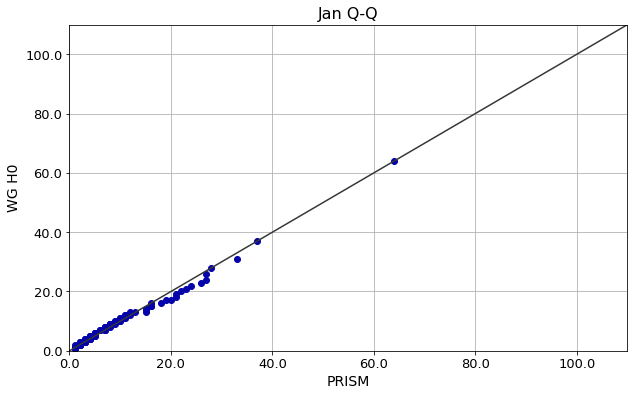

In [29]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Jan Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [30]:
sns.set(style="ticks", color_codes=True)

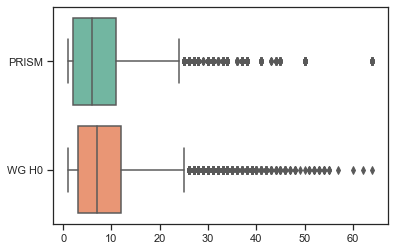

In [31]:
ax = sns.boxplot(data=CompJan, orient="h", palette="Set2")

In [32]:
sns.set(style="white", color_codes=True)

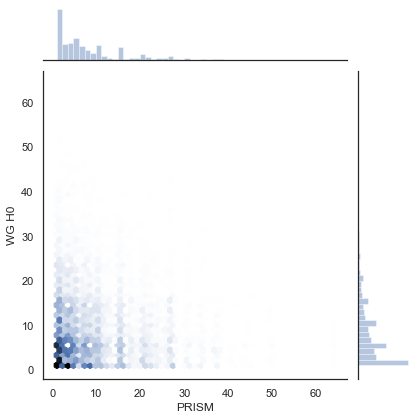

In [33]:
JanG = sns.jointplot(x='PRISM', y='WG H0', data=CompJan, kind="hex")

## Feb

First get our overall tracking values

In [34]:
AveLister.append( [ PRFebDF['Dry_Count'].mean(), H0FebDF['Dry_Count'].mean() ] )
VarLister.append( [ PRFebDF['Dry_Count'].var(), H0FebDF['Dry_Count'].var() ] )
SkewLister.append( [ PRFebDF['Dry_Count'].skew(), H0FebDF['Dry_Count'].skew() ] )
KurtLister.append( [ PRFebDF['Dry_Count'].kurtosis(), H0FebDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ PRFebDF['Dry_Count'].count(), H0FebDF['Dry_Count'].count() ] )
PLister.append( [ (1.0 - (( PRFebDF['Dry_Count'].var() - PRFebDF['Dry_Count'].mean() ) / 
                            PRFebDF['Dry_Count'].var() ) ),
                  (1.0 - (( H0FebDF['Dry_Count'].var() - H0FebDF['Dry_Count'].mean() ) / 
                            H0FebDF['Dry_Count'].var() ) ) ])
NLister.append( [ ( PRFebDF['Dry_Count'].mean()**2.0 / 
                   ( PRFebDF['Dry_Count'].var() - PRFebDF['Dry_Count'].mean() ) ),
                  ( H0FebDF['Dry_Count'].mean()**2.0 / 
                   ( H0FebDF['Dry_Count'].var() - H0FebDF['Dry_Count'].mean() ) ) ])
MedianLister.append( [ PRFebDF['Dry_Count'].median(), H0FebDF['Dry_Count'].median() ] )
MaxLister.append( [ PRFebDF['Dry_Count'].max(), H0FebDF['Dry_Count'].max() ] )
MinLister.append( [ PRFebDF['Dry_Count'].min(), H0FebDF['Dry_Count'].min() ] )

In [35]:
NumPR = len( PRFebDF )
NumH0 = len( H0FebDF )
NumPR, NumH0

(16771, 18168304)

In [36]:
CompFeb = pd.DataFrame( data={ 'PRISM' : np.array( PRFebDF['Dry_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0FebDF['Dry_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [37]:
display( HTML( CompFeb.describe().to_html() ) )

,PRISM,WG H0
count,16771.000000,16771.000000
mean,8.246318,8.258601
std,8.429615,7.288392
min,1.000000,1.000000
25%,3.000000,3.000000
50%,5.000000,6.000000
75%,10.000000,11.500000
max,54.000000,60.000000


In [38]:
PRQs = CompFeb['PRISM'].quantile( q=OurQs )

In [39]:
H0Qs = CompFeb['WG H0'].quantile( q=OurQs )

In [40]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

60.0

In [41]:
MaxVal = round( MaxVal, -1 ) + 10.0
MaxVal

70.0

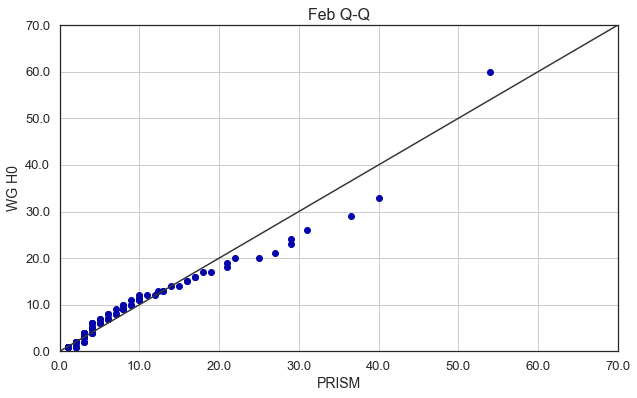

In [42]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Feb Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [43]:
sns.set(style="ticks", color_codes=True)

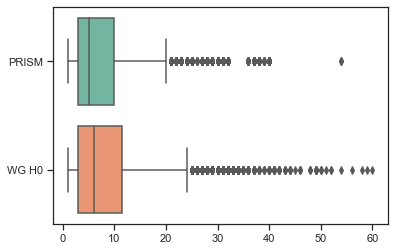

In [44]:
ax = sns.boxplot(data=CompFeb, orient="h", palette="Set2")

In [45]:
sns.set(style="white", color_codes=True)

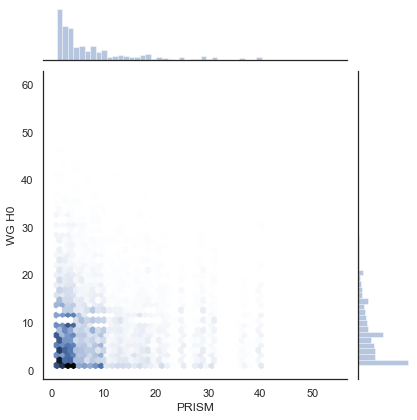

In [46]:
FebG = sns.jointplot(x='PRISM', y='WG H0', data=CompFeb, kind="hex")

## Mar

First get our overall tracking values

In [47]:
AveLister.append( [ PRMarDF['Dry_Count'].mean(), H0MarDF['Dry_Count'].mean() ] )
VarLister.append( [ PRMarDF['Dry_Count'].var(), H0MarDF['Dry_Count'].var() ] )
SkewLister.append( [ PRMarDF['Dry_Count'].skew(), H0MarDF['Dry_Count'].skew() ] )
KurtLister.append( [ PRMarDF['Dry_Count'].kurtosis(), H0MarDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ PRMarDF['Dry_Count'].count(), H0MarDF['Dry_Count'].count() ] )
PLister.append( [ (1.0 - (( PRMarDF['Dry_Count'].var() - PRMarDF['Dry_Count'].mean() ) / 
                            PRMarDF['Dry_Count'].var() ) ),
                  (1.0 - (( H0MarDF['Dry_Count'].var() - H0MarDF['Dry_Count'].mean() ) / 
                            H0MarDF['Dry_Count'].var() ) ) ])
NLister.append( [ ( PRMarDF['Dry_Count'].mean()**2.0 / 
                   ( PRMarDF['Dry_Count'].var() - PRMarDF['Dry_Count'].mean() ) ),
                  ( H0MarDF['Dry_Count'].mean()**2.0 / 
                   ( H0MarDF['Dry_Count'].var() - H0MarDF['Dry_Count'].mean() ) ) ])
MedianLister.append( [ PRMarDF['Dry_Count'].median(), H0MarDF['Dry_Count'].median() ] )
MaxLister.append( [ PRMarDF['Dry_Count'].max(), H0MarDF['Dry_Count'].max() ] )
MinLister.append( [ PRMarDF['Dry_Count'].min(), H0MarDF['Dry_Count'].min() ] )

In [48]:
NumPR = len( PRMarDF )
NumH0 = len( H0MarDF )
NumPR, NumH0

(21703, 20347360)

In [49]:
CompMar = pd.DataFrame( data={ 'PRISM' : np.array( PRMarDF['Dry_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0MarDF['Dry_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [50]:
display( HTML( CompMar.describe().to_html() ) )

,PRISM,WG H0
count,21703.000000,21703.000000
mean,8.187301,8.226651
std,7.879757,6.779599
min,1.000000,1.000000
25%,3.000000,3.000000
50%,6.000000,7.000000
75%,10.000000,11.000000
max,61.000000,71.000000


In [51]:
PRQs = CompMar['PRISM'].quantile( q=OurQs )

In [52]:
H0Qs = CompMar['WG H0'].quantile( q=OurQs )

In [53]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

71.0

In [54]:
MaxVal = round( MaxVal, -1 ) + 10.0
MaxVal

80.0

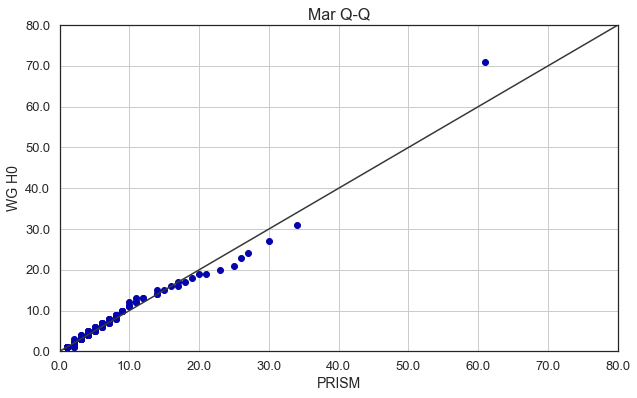

In [55]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Mar Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [56]:
sns.set(style="ticks", color_codes=True)

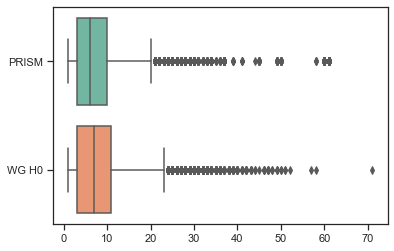

In [57]:
ax = sns.boxplot(data=CompMar, orient="h", palette="Set2")

In [58]:
sns.set(style="white", color_codes=True)

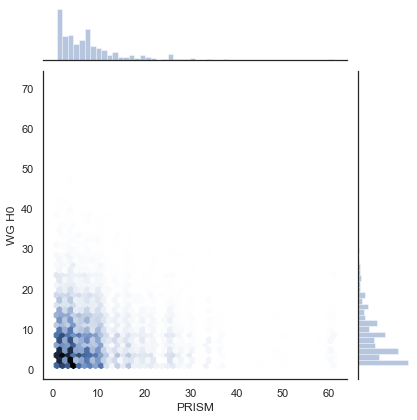

In [59]:
MarG = sns.jointplot(x='PRISM', y='WG H0', data=CompMar, kind="hex")

## Apr

First get our overall tracking values

In [60]:
AveLister.append( [ PRAprDF['Dry_Count'].mean(), H0AprDF['Dry_Count'].mean() ] )
VarLister.append( [ PRAprDF['Dry_Count'].var(), H0AprDF['Dry_Count'].var() ] )
SkewLister.append( [ PRAprDF['Dry_Count'].skew(), H0AprDF['Dry_Count'].skew() ] )
KurtLister.append( [ PRAprDF['Dry_Count'].kurtosis(), H0AprDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ PRAprDF['Dry_Count'].count(), H0AprDF['Dry_Count'].count() ] )
PLister.append( [ (1.0 - (( PRAprDF['Dry_Count'].var() - PRAprDF['Dry_Count'].mean() ) / 
                            PRAprDF['Dry_Count'].var() ) ),
                  (1.0 - (( H0AprDF['Dry_Count'].var() - H0AprDF['Dry_Count'].mean() ) / 
                            H0AprDF['Dry_Count'].var() ) ) ])
NLister.append( [ ( PRAprDF['Dry_Count'].mean()**2.0 / 
                   ( PRAprDF['Dry_Count'].var() - PRAprDF['Dry_Count'].mean() ) ),
                  ( H0AprDF['Dry_Count'].mean()**2.0 / 
                   ( H0AprDF['Dry_Count'].var() - H0AprDF['Dry_Count'].mean() ) ) ])
MedianLister.append( [ PRAprDF['Dry_Count'].median(), H0AprDF['Dry_Count'].median() ] )
MaxLister.append( [ PRAprDF['Dry_Count'].max(), H0AprDF['Dry_Count'].max() ] )
MinLister.append( [ PRAprDF['Dry_Count'].min(), H0AprDF['Dry_Count'].min() ] )

In [61]:
NumPR = len( PRAprDF )
NumH0 = len( H0AprDF )
NumPR, NumH0

(17306, 20544260)

In [62]:
CompApr = pd.DataFrame( data={ 'PRISM' : np.array( PRAprDF['Dry_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0AprDF['Dry_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [63]:
display( HTML( CompApr.describe().to_html() ) )

,PRISM,WG H0
count,17306.000000,17306.000000
mean,7.712354,7.784294
std,7.125928,6.135906
min,1.000000,1.000000
25%,3.000000,3.000000
50%,6.000000,6.000000
75%,10.000000,11.000000
max,50.000000,55.000000


In [64]:
PRQs = CompApr['PRISM'].quantile( q=OurQs )

In [65]:
H0Qs = CompApr['WG H0'].quantile( q=OurQs )

In [66]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

55.0

In [67]:
MaxVal = round( MaxVal, -1 ) + 10.0
MaxVal

70.0

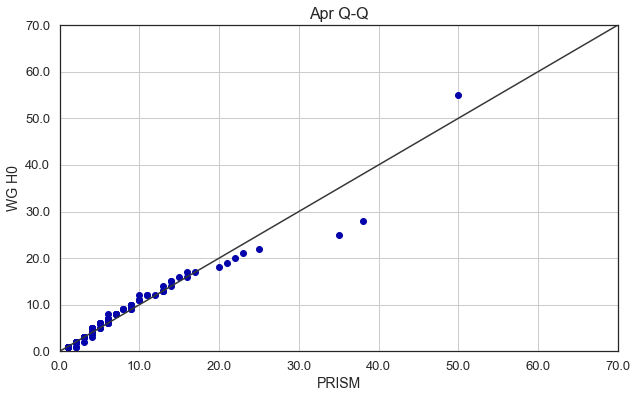

In [68]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Apr Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [69]:
sns.set(style="ticks", color_codes=True)

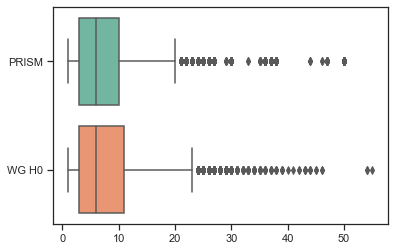

In [70]:
ax = sns.boxplot(data=CompApr, orient="h", palette="Set2")

In [71]:
sns.set(style="white", color_codes=True)

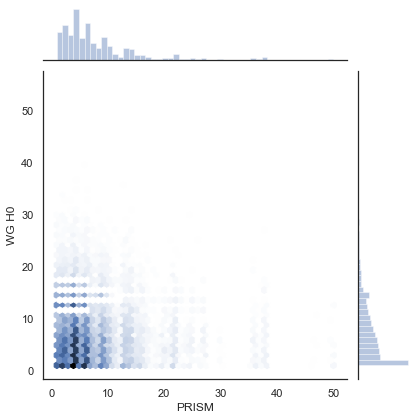

In [72]:
AprG = sns.jointplot(x='PRISM', y='WG H0', data=CompApr, kind="hex")

## May

First get our overall tracking values

In [73]:
AveLister.append( [ PRMayDF['Dry_Count'].mean(), H0MayDF['Dry_Count'].mean() ] )
VarLister.append( [ PRMayDF['Dry_Count'].var(), H0MayDF['Dry_Count'].var() ] )
SkewLister.append( [ PRMayDF['Dry_Count'].skew(), H0MayDF['Dry_Count'].skew() ] )
KurtLister.append( [ PRMayDF['Dry_Count'].kurtosis(), H0MayDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ PRMayDF['Dry_Count'].count(), H0MayDF['Dry_Count'].count() ] )
PLister.append( [ (1.0 - (( PRMayDF['Dry_Count'].var() - PRMayDF['Dry_Count'].mean() ) / 
                            PRMayDF['Dry_Count'].var() ) ),
                  (1.0 - (( H0MayDF['Dry_Count'].var() - H0MayDF['Dry_Count'].mean() ) / 
                            H0MayDF['Dry_Count'].var() ) ) ])
NLister.append( [ ( PRMayDF['Dry_Count'].mean()**2.0 / 
                   ( PRMayDF['Dry_Count'].var() - PRMayDF['Dry_Count'].mean() ) ),
                  ( H0MayDF['Dry_Count'].mean()**2.0 / 
                   ( H0MayDF['Dry_Count'].var() - H0MayDF['Dry_Count'].mean() ) ) ])
MedianLister.append( [ PRMayDF['Dry_Count'].median(), H0MayDF['Dry_Count'].median() ] )
MaxLister.append( [ PRMayDF['Dry_Count'].max(), H0MayDF['Dry_Count'].max() ] )
MinLister.append( [ PRMayDF['Dry_Count'].min(), H0MayDF['Dry_Count'].min() ] )

In [74]:
NumPR = len( PRMayDF )
NumH0 = len( H0MayDF )
NumPR, NumH0

(25243, 24630298)

In [75]:
CompMay = pd.DataFrame( data={ 'PRISM' : np.array( PRMayDF['Dry_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0MayDF['Dry_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [76]:
display( HTML( CompMay.describe().to_html() ) )

,PRISM,WG H0
count,25243.000000,25243.000000
mean,6.137622,6.229450
std,6.091366,5.237468
min,1.000000,1.000000
25%,2.000000,2.000000
50%,4.000000,5.000000
75%,9.000000,9.000000
max,48.000000,48.000000


In [77]:
PRQs = CompMay['PRISM'].quantile( q=OurQs )

In [78]:
H0Qs = CompMay['WG H0'].quantile( q=OurQs )

In [79]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

48.0

In [80]:
MaxVal = round( MaxVal, -1 ) + 10.0
MaxVal

60.0

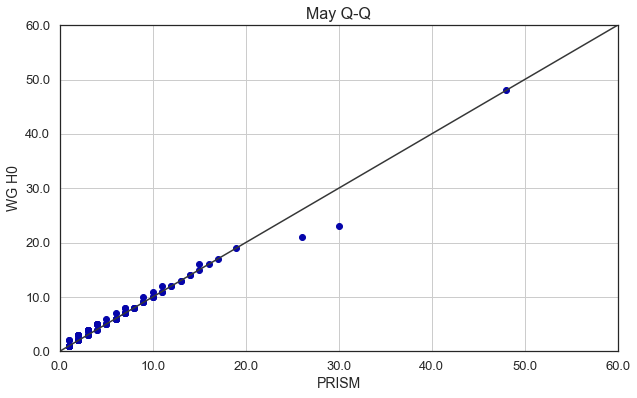

In [81]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("May Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [82]:
sns.set(style="ticks", color_codes=True)

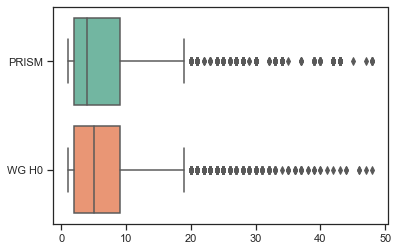

In [83]:
ax = sns.boxplot(data=CompMay, orient="h", palette="Set2")

In [84]:
sns.set(style="white", color_codes=True)

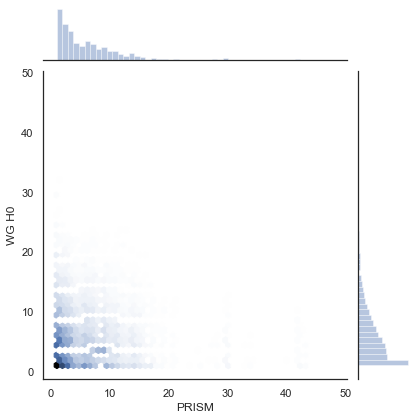

In [85]:
MayG = sns.jointplot(x='PRISM', y='WG H0', data=CompMay, kind="hex")

## Jun

First get our overall tracking values

In [86]:
AveLister.append( [ PRJunDF['Dry_Count'].mean(), H0JunDF['Dry_Count'].mean() ] )
VarLister.append( [ PRJunDF['Dry_Count'].var(), H0JunDF['Dry_Count'].var() ] )
SkewLister.append( [ PRJunDF['Dry_Count'].skew(), H0JunDF['Dry_Count'].skew() ] )
KurtLister.append( [ PRJunDF['Dry_Count'].kurtosis(), H0JunDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ PRJunDF['Dry_Count'].count(), H0JunDF['Dry_Count'].count() ] )
PLister.append( [ (1.0 - (( PRJunDF['Dry_Count'].var() - PRJunDF['Dry_Count'].mean() ) / 
                            PRJunDF['Dry_Count'].var() ) ),
                  (1.0 - (( H0JunDF['Dry_Count'].var() - H0JunDF['Dry_Count'].mean() ) / 
                            H0JunDF['Dry_Count'].var() ) ) ])
NLister.append( [ ( PRJunDF['Dry_Count'].mean()**2.0 / 
                   ( PRJunDF['Dry_Count'].var() - PRJunDF['Dry_Count'].mean() ) ),
                  ( H0JunDF['Dry_Count'].mean()**2.0 / 
                   ( H0JunDF['Dry_Count'].var() - H0JunDF['Dry_Count'].mean() ) ) ])
MedianLister.append( [ PRJunDF['Dry_Count'].median(), H0JunDF['Dry_Count'].median() ] )
MaxLister.append( [ PRJunDF['Dry_Count'].max(), H0JunDF['Dry_Count'].max() ] )
MinLister.append( [ PRJunDF['Dry_Count'].min(), H0JunDF['Dry_Count'].min() ] )

In [87]:
NumPR = len( PRJunDF )
NumH0 = len( H0JunDF )
NumPR, NumH0

(22703, 22853094)

In [88]:
CompJun = pd.DataFrame( data={ 'PRISM' : np.array( PRJunDF['Dry_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0JunDF['Dry_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [89]:
display( HTML( CompJun.describe().to_html() ) )

,PRISM,WG H0
count,22703.000000,22703.000000
mean,6.979430,7.095406
std,8.731973,6.924532
min,1.000000,1.000000
25%,2.000000,2.000000
50%,4.000000,5.000000
75%,8.000000,10.000000
max,91.000000,64.000000


In [90]:
PRQs = CompJun['PRISM'].quantile( q=OurQs )

In [91]:
H0Qs = CompJun['WG H0'].quantile( q=OurQs )

In [92]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

91.0

In [93]:
MaxVal = round( MaxVal, -1 ) + 10.0
MaxVal

100.0

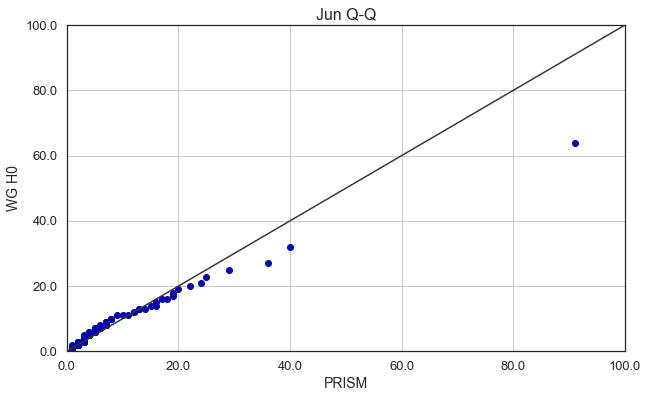

In [94]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Jun Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [95]:
sns.set(style="ticks", color_codes=True)

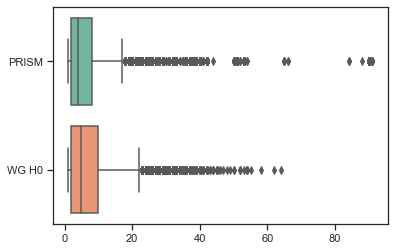

In [96]:
ax = sns.boxplot(data=CompJun, orient="h", palette="Set2")

In [97]:
sns.set(style="white", color_codes=True)

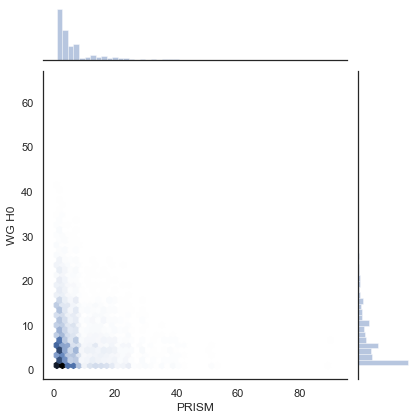

In [98]:
JunG = sns.jointplot(x='PRISM', y='WG H0', data=CompJun, kind="hex")

## Jul

First get our overall tracking values

In [99]:
AveLister.append( [ PRJulDF['Dry_Count'].mean(), H0JulDF['Dry_Count'].mean() ] )
VarLister.append( [ PRJulDF['Dry_Count'].var(), H0JulDF['Dry_Count'].var() ] )
SkewLister.append( [ PRJulDF['Dry_Count'].skew(), H0JulDF['Dry_Count'].skew() ] )
KurtLister.append( [ PRJulDF['Dry_Count'].kurtosis(), H0JulDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ PRJulDF['Dry_Count'].count(), H0JulDF['Dry_Count'].count() ] )
PLister.append( [ (1.0 - (( PRJulDF['Dry_Count'].var() - PRJulDF['Dry_Count'].mean() ) / 
                            PRJulDF['Dry_Count'].var() ) ),
                  (1.0 - (( H0JulDF['Dry_Count'].var() - H0JulDF['Dry_Count'].mean() ) / 
                            H0JulDF['Dry_Count'].var() ) ) ])
NLister.append( [ ( PRJulDF['Dry_Count'].mean()**2.0 / 
                   ( PRJulDF['Dry_Count'].var() - PRJulDF['Dry_Count'].mean() ) ),
                  ( H0JulDF['Dry_Count'].mean()**2.0 / 
                   ( H0JulDF['Dry_Count'].var() - H0JulDF['Dry_Count'].mean() ) ) ])
MedianLister.append( [ PRJulDF['Dry_Count'].median(), H0JulDF['Dry_Count'].median() ] )
MaxLister.append( [ PRJulDF['Dry_Count'].max(), H0JulDF['Dry_Count'].max() ] )
MinLister.append( [ PRJulDF['Dry_Count'].min(), H0JulDF['Dry_Count'].min() ] )

In [100]:
NumPR = len( PRJulDF )
NumH0 = len( H0JulDF )
NumPR, NumH0

(17730, 19741282)

In [101]:
CompJul = pd.DataFrame( data={ 'PRISM' : np.array( PRJulDF['Dry_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0JulDF['Dry_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [102]:
display( HTML( CompJul.describe().to_html() ) )

,PRISM,WG H0
count,17730.00000,17730.000000
mean,9.00423,9.100056
std,9.49838,8.643015
min,1.00000,1.000000
25%,2.00000,3.000000
50%,6.00000,6.000000
75%,13.00000,13.000000
max,48.00000,90.000000


In [103]:
PRQs = CompJul['PRISM'].quantile( q=OurQs )

In [104]:
H0Qs = CompJul['WG H0'].quantile( q=OurQs )

In [105]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

90.0

In [106]:
MaxVal = round( MaxVal, -1 ) + 10.0
MaxVal

100.0

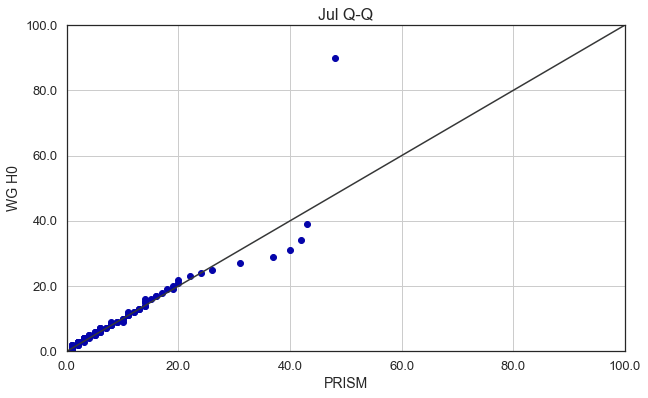

In [107]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Jul Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [108]:
sns.set(style="ticks", color_codes=True)

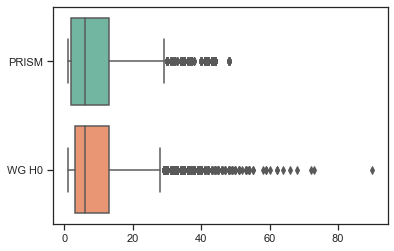

In [109]:
ax = sns.boxplot(data=CompJul, orient="h", palette="Set2")

In [110]:
sns.set(style="white", color_codes=True)

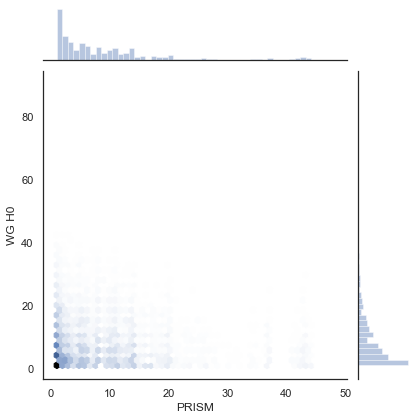

In [111]:
JulG = sns.jointplot(x='PRISM', y='WG H0', data=CompJul, kind="hex")

## Aug

First get our overall tracking values

In [112]:
AveLister.append( [ PRAugDF['Dry_Count'].mean(), H0AugDF['Dry_Count'].mean() ] )
VarLister.append( [ PRAugDF['Dry_Count'].var(), H0AugDF['Dry_Count'].var() ] )
SkewLister.append( [ PRAugDF['Dry_Count'].skew(), H0AugDF['Dry_Count'].skew() ] )
KurtLister.append( [ PRAugDF['Dry_Count'].kurtosis(), H0AugDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ PRAugDF['Dry_Count'].count(), H0AugDF['Dry_Count'].count() ] )
PLister.append( [ (1.0 - (( PRAugDF['Dry_Count'].var() - PRAugDF['Dry_Count'].mean() ) / 
                            PRAugDF['Dry_Count'].var() ) ),
                  (1.0 - (( H0AugDF['Dry_Count'].var() - H0AugDF['Dry_Count'].mean() ) / 
                            H0AugDF['Dry_Count'].var() ) ) ])
NLister.append( [ ( PRAugDF['Dry_Count'].mean()**2.0 / 
                   ( PRAugDF['Dry_Count'].var() - PRAugDF['Dry_Count'].mean() ) ),
                  ( H0AugDF['Dry_Count'].mean()**2.0 / 
                   ( H0AugDF['Dry_Count'].var() - H0AugDF['Dry_Count'].mean() ) ) ])
MedianLister.append( [ PRAugDF['Dry_Count'].median(), H0AugDF['Dry_Count'].median() ] )
MaxLister.append( [ PRAugDF['Dry_Count'].max(), H0AugDF['Dry_Count'].max() ] )
MinLister.append( [ PRAugDF['Dry_Count'].min(), H0AugDF['Dry_Count'].min() ] )

In [113]:
NumPR = len( PRAugDF )
NumH0 = len( H0AugDF )
NumPR, NumH0

(19119, 21306076)

In [114]:
CompAug = pd.DataFrame( data={ 'PRISM' : np.array( PRAugDF['Dry_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0AugDF['Dry_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [115]:
display( HTML( CompAug.describe().to_html() ) )

,PRISM,WG H0
count,19119.000000,19119.000000
mean,6.787960,6.865788
std,7.053983,5.966805
min,1.000000,1.000000
25%,2.000000,2.000000
50%,5.000000,5.000000
75%,9.000000,10.000000
max,122.000000,56.000000


In [116]:
PRQs = CompAug['PRISM'].quantile( q=OurQs )

In [117]:
H0Qs = CompAug['WG H0'].quantile( q=OurQs )

In [118]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

122.0

In [119]:
MaxVal = round( MaxVal, -1 ) + 10.0
MaxVal

130.0

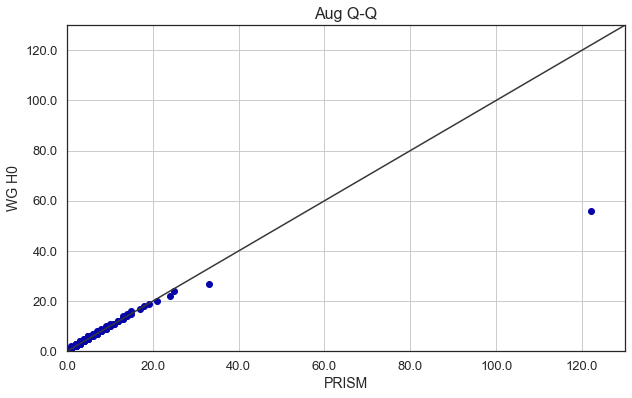

In [120]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Aug Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [121]:
sns.set(style="ticks", color_codes=True)

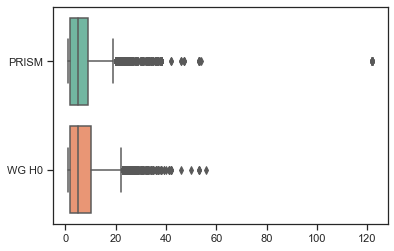

In [122]:
ax = sns.boxplot(data=CompAug, orient="h", palette="Set2")

In [123]:
sns.set(style="white", color_codes=True)

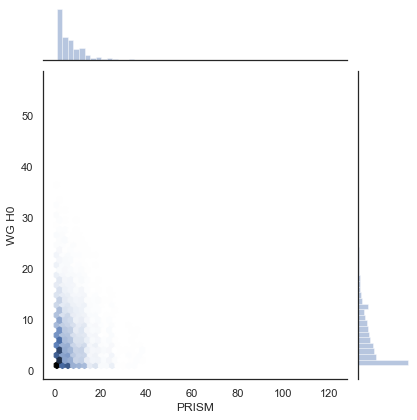

In [124]:
AugG = sns.jointplot(x='PRISM', y='WG H0', data=CompAug, kind="hex")

## Sep

First get our overall tracking values

In [125]:
AveLister.append( [ PRSepDF['Dry_Count'].mean(), H0SepDF['Dry_Count'].mean() ] )
VarLister.append( [ PRSepDF['Dry_Count'].var(), H0SepDF['Dry_Count'].var() ] )
SkewLister.append( [ PRSepDF['Dry_Count'].skew(), H0SepDF['Dry_Count'].skew() ] )
KurtLister.append( [ PRSepDF['Dry_Count'].kurtosis(), H0SepDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ PRSepDF['Dry_Count'].count(), H0SepDF['Dry_Count'].count() ] )
PLister.append( [ (1.0 - (( PRSepDF['Dry_Count'].var() - PRSepDF['Dry_Count'].mean() ) / 
                            PRSepDF['Dry_Count'].var() ) ),
                  (1.0 - (( H0SepDF['Dry_Count'].var() - H0SepDF['Dry_Count'].mean() ) / 
                            H0SepDF['Dry_Count'].var() ) ) ])
NLister.append( [ ( PRSepDF['Dry_Count'].mean()**2.0 / 
                   ( PRSepDF['Dry_Count'].var() - PRSepDF['Dry_Count'].mean() ) ),
                  ( H0SepDF['Dry_Count'].mean()**2.0 / 
                   ( H0SepDF['Dry_Count'].var() - H0SepDF['Dry_Count'].mean() ) ) ])
MedianLister.append( [ PRSepDF['Dry_Count'].median(), H0SepDF['Dry_Count'].median() ] )
MaxLister.append( [ PRSepDF['Dry_Count'].max(), H0SepDF['Dry_Count'].max() ] )
MinLister.append( [ PRSepDF['Dry_Count'].min(), H0SepDF['Dry_Count'].min() ] )

In [126]:
NumPR = len( PRSepDF )
NumH0 = len( H0SepDF )
NumPR, NumH0

(22515, 21533270)

In [127]:
CompSep = pd.DataFrame( data={ 'PRISM' : np.array( PRSepDF['Dry_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0SepDF['Dry_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [128]:
display( HTML( CompSep.describe().to_html() ) )

,PRISM,WG H0
count,22515.000000,22515.000000
mean,7.639352,7.724362
std,8.227514,6.946839
min,1.000000,1.000000
25%,2.000000,3.000000
50%,4.000000,6.000000
75%,10.000000,11.000000
max,100.000000,84.000000


In [129]:
PRQs = CompSep['PRISM'].quantile( q=OurQs )

In [130]:
H0Qs = CompSep['WG H0'].quantile( q=OurQs )

In [131]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

100.0

In [132]:
MaxVal = round( MaxVal, -1 ) + 10.0
MaxVal

110.0

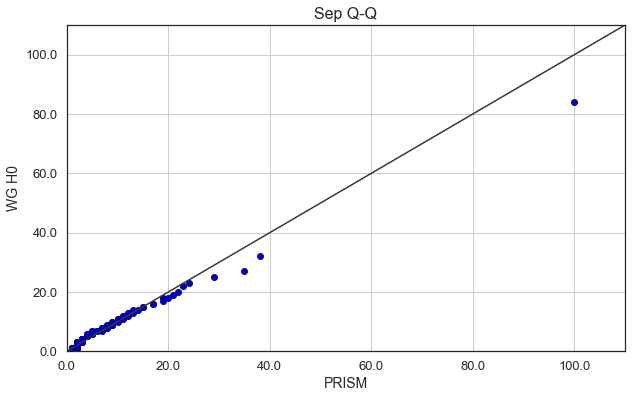

In [133]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Sep Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [134]:
sns.set(style="ticks", color_codes=True)

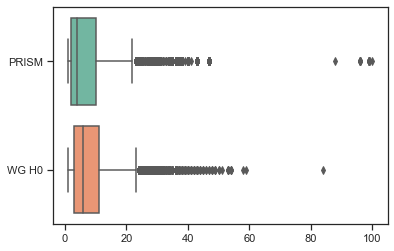

In [135]:
ax = sns.boxplot(data=CompSep, orient="h", palette="Set2")

In [136]:
sns.set(style="white", color_codes=True)

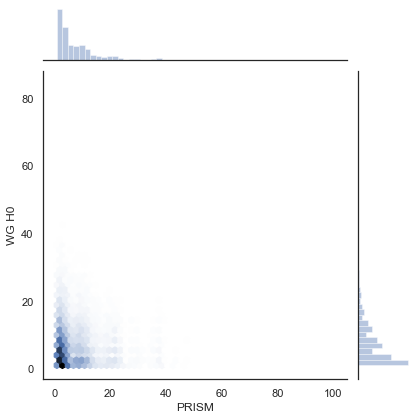

In [137]:
SepG = sns.jointplot(x='PRISM', y='WG H0', data=CompSep, kind="hex")

## Oct

First get our overall tracking values

In [138]:
AveLister.append( [ PROctDF['Dry_Count'].mean(), H0OctDF['Dry_Count'].mean() ] )
VarLister.append( [ PROctDF['Dry_Count'].var(), H0OctDF['Dry_Count'].var() ] )
SkewLister.append( [ PROctDF['Dry_Count'].skew(), H0OctDF['Dry_Count'].skew() ] )
KurtLister.append( [ PROctDF['Dry_Count'].kurtosis(), H0OctDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ PROctDF['Dry_Count'].count(), H0OctDF['Dry_Count'].count() ] )
PLister.append( [ (1.0 - (( PROctDF['Dry_Count'].var() - PROctDF['Dry_Count'].mean() ) / 
                            PROctDF['Dry_Count'].var() ) ),
                  (1.0 - (( H0OctDF['Dry_Count'].var() - H0OctDF['Dry_Count'].mean() ) / 
                            H0OctDF['Dry_Count'].var() ) ) ])
NLister.append( [ ( PROctDF['Dry_Count'].mean()**2.0 / 
                   ( PROctDF['Dry_Count'].var() - PROctDF['Dry_Count'].mean() ) ),
                  ( H0OctDF['Dry_Count'].mean()**2.0 / 
                   ( H0OctDF['Dry_Count'].var() - H0OctDF['Dry_Count'].mean() ) ) ])
MedianLister.append( [ PROctDF['Dry_Count'].median(), H0OctDF['Dry_Count'].median() ] )
MaxLister.append( [ PROctDF['Dry_Count'].max(), H0OctDF['Dry_Count'].max() ] )
MinLister.append( [ PROctDF['Dry_Count'].min(), H0OctDF['Dry_Count'].min() ] )

In [139]:
NumPR = len( PROctDF )
NumH0 = len( H0OctDF )
NumPR, NumH0

(18843, 18829646)

In [140]:
CompOct = pd.DataFrame( data={ 'PRISM' : np.array( PROctDF['Dry_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0OctDF['Dry_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [141]:
display( HTML( CompOct.describe().to_html() ) )

,PRISM,WG H0
count,18843.000000,18843.000000
mean,9.825452,9.916043
std,12.975111,10.381138
min,1.000000,1.000000
25%,2.000000,2.000000
50%,5.000000,6.000000
75%,11.000000,14.000000
max,85.000000,116.000000


In [142]:
PRQs = CompOct['PRISM'].quantile( q=OurQs )

In [143]:
H0Qs = CompOct['WG H0'].quantile( q=OurQs )

In [144]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

116.0

In [145]:
MaxVal = round( MaxVal, -1 ) + 10.0
MaxVal

130.0

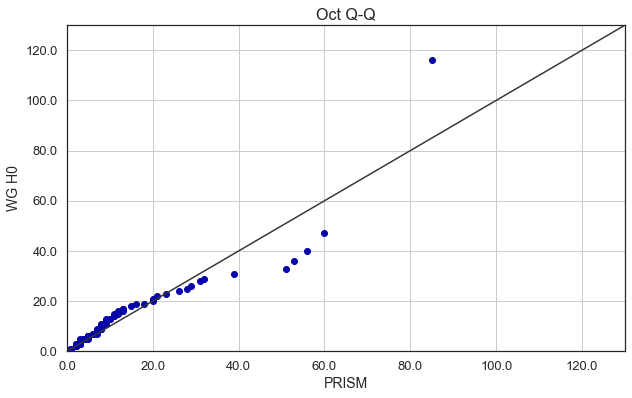

In [146]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Oct Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [147]:
sns.set(style="ticks", color_codes=True)

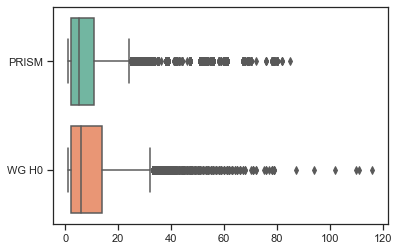

In [148]:
ax = sns.boxplot(data=CompOct, orient="h", palette="Set2")

In [149]:
sns.set(style="white", color_codes=True)

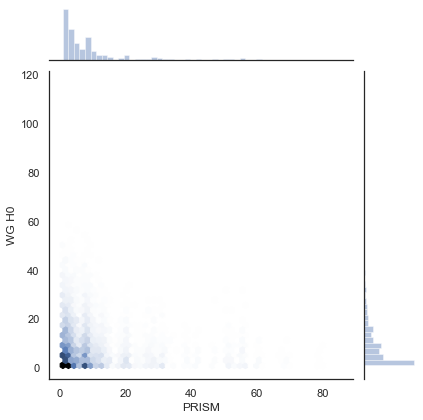

In [150]:
OctG = sns.jointplot(x='PRISM', y='WG H0', data=CompOct, kind="hex")

## Nov

First get our overall tracking values

In [151]:
AveLister.append( [ PRNovDF['Dry_Count'].mean(), H0NovDF['Dry_Count'].mean() ] )
VarLister.append( [ PRNovDF['Dry_Count'].var(), H0NovDF['Dry_Count'].var() ] )
SkewLister.append( [ PRNovDF['Dry_Count'].skew(), H0NovDF['Dry_Count'].skew() ] )
KurtLister.append( [ PRNovDF['Dry_Count'].kurtosis(), H0NovDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ PRNovDF['Dry_Count'].count(), H0NovDF['Dry_Count'].count() ] )
PLister.append( [ (1.0 - (( PRNovDF['Dry_Count'].var() - PRNovDF['Dry_Count'].mean() ) / 
                            PRNovDF['Dry_Count'].var() ) ),
                  (1.0 - (( H0NovDF['Dry_Count'].var() - H0NovDF['Dry_Count'].mean() ) / 
                            H0NovDF['Dry_Count'].var() ) ) ])
NLister.append( [ ( PRNovDF['Dry_Count'].mean()**2.0 / 
                   ( PRNovDF['Dry_Count'].var() - PRNovDF['Dry_Count'].mean() ) ),
                  ( H0NovDF['Dry_Count'].mean()**2.0 / 
                   ( H0NovDF['Dry_Count'].var() - H0NovDF['Dry_Count'].mean() ) ) ])
MedianLister.append( [ PRNovDF['Dry_Count'].median(), H0NovDF['Dry_Count'].median() ] )
MaxLister.append( [ PRNovDF['Dry_Count'].max(), H0NovDF['Dry_Count'].max() ] )
MinLister.append( [ PRNovDF['Dry_Count'].min(), H0NovDF['Dry_Count'].min() ] )

In [152]:
NumPR = len( PRNovDF )
NumH0 = len( H0NovDF )
NumPR, NumH0

(13962, 15564780)

In [153]:
CompNov = pd.DataFrame( data={ 'PRISM' : np.array( PRNovDF['Dry_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0NovDF['Dry_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [154]:
display( HTML( CompNov.describe().to_html() ) )

,PRISM,WG H0
count,13962.000000,13962.000000
mean,11.089027,11.074273
std,11.417011,10.253271
min,1.000000,1.000000
25%,3.000000,4.000000
50%,8.000000,8.000000
75%,14.000000,15.000000
max,64.000000,103.000000


In [155]:
PRQs = CompNov['PRISM'].quantile( q=OurQs )

In [156]:
H0Qs = CompNov['WG H0'].quantile( q=OurQs )

In [157]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

103.0

In [158]:
MaxVal = round( MaxVal, -1 ) + 10.0
MaxVal

110.0

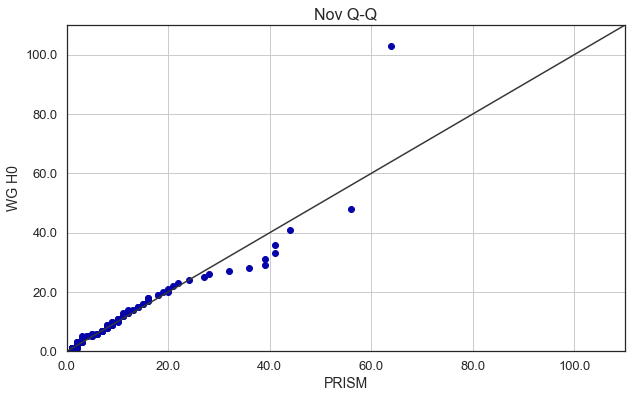

In [159]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Nov Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [160]:
sns.set(style="ticks", color_codes=True)

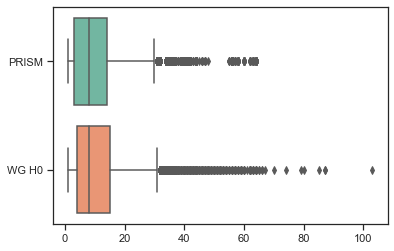

In [161]:
ax = sns.boxplot(data=CompNov, orient="h", palette="Set2")

In [162]:
sns.set(style="white", color_codes=True)

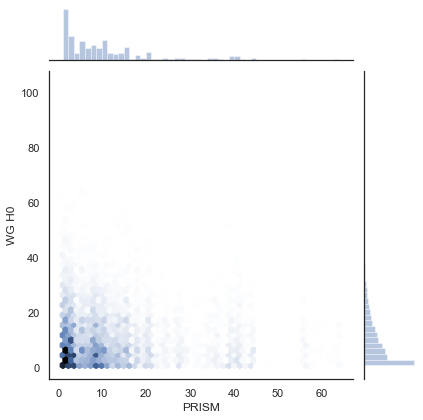

In [163]:
NovG = sns.jointplot(x='PRISM', y='WG H0', data=CompNov, kind="hex")

## Dec

First get our overall tracking values

In [164]:
AveLister.append( [ PRDecDF['Dry_Count'].mean(), H0DecDF['Dry_Count'].mean() ] )
VarLister.append( [ PRDecDF['Dry_Count'].var(), H0DecDF['Dry_Count'].var() ] )
SkewLister.append( [ PRDecDF['Dry_Count'].skew(), H0DecDF['Dry_Count'].skew() ] )
KurtLister.append( [ PRDecDF['Dry_Count'].kurtosis(), H0DecDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ PRDecDF['Dry_Count'].count(), H0DecDF['Dry_Count'].count() ] )
PLister.append( [ (1.0 - (( PRDecDF['Dry_Count'].var() - PRDecDF['Dry_Count'].mean() ) / 
                            PRDecDF['Dry_Count'].var() ) ),
                  (1.0 - (( H0DecDF['Dry_Count'].var() - H0DecDF['Dry_Count'].mean() ) / 
                            H0DecDF['Dry_Count'].var() ) ) ])
NLister.append( [ ( PRDecDF['Dry_Count'].mean()**2.0 / 
                   ( PRDecDF['Dry_Count'].var() - PRDecDF['Dry_Count'].mean() ) ),
                  ( H0DecDF['Dry_Count'].mean()**2.0 / 
                   ( H0DecDF['Dry_Count'].var() - H0DecDF['Dry_Count'].mean() ) ) ])
MedianLister.append( [ PRDecDF['Dry_Count'].median(), H0DecDF['Dry_Count'].median() ] )
MaxLister.append( [ PRDecDF['Dry_Count'].max(), H0DecDF['Dry_Count'].max() ] )
MinLister.append( [ PRDecDF['Dry_Count'].min(), H0DecDF['Dry_Count'].min() ] )

In [165]:
NumPR = len( PRDecDF )
NumH0 = len( H0DecDF )
NumPR, NumH0

(13660, 16185884)

In [166]:
CompDec = pd.DataFrame( data={ 'PRISM' : np.array( PRDecDF['Dry_Count'], dtype=np.int32),
                               "WG H0" : np.array( H0DecDF['Dry_Count'].sample(n=NumPR), 
                                                  dtype=np.int32 ), } )

In [167]:
display( HTML( CompDec.describe().to_html() ) )

,PRISM,WG H0
count,13660.000000,13660.000000
mean,11.275549,11.211786
std,12.856142,11.058571
min,1.000000,1.000000
25%,3.000000,3.000000
50%,6.000000,8.000000
75%,15.000000,16.000000
max,90.000000,103.000000


In [168]:
PRQs = CompDec['PRISM'].quantile( q=OurQs )

In [169]:
H0Qs = CompDec['WG H0'].quantile( q=OurQs )

In [170]:
MaxVal = max( PRQs.max(), H0Qs.max() )
MaxVal

103.0

In [171]:
MaxVal = round( MaxVal, -1 ) + 10.0
MaxVal

110.0

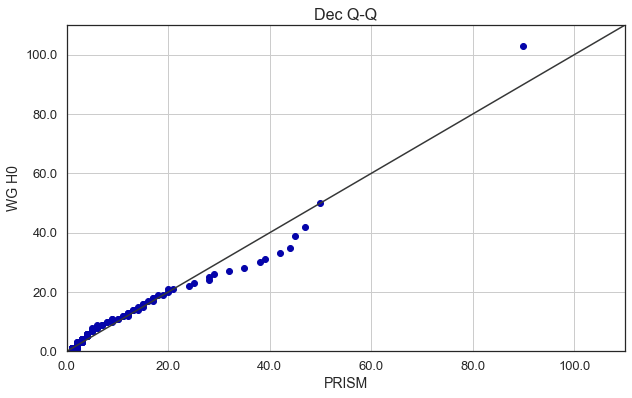

In [172]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRQs.values, H0Qs.values, marker='o', linestyle='None', color='xkcd:royal blue' )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Dec Q-Q", fontsize=16)
ax11.set_xlabel('PRISM', fontsize=14 )
ax11.set_ylabel('WG H0', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
#ax11.legend(loc='lower center')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [173]:
sns.set(style="ticks", color_codes=True)

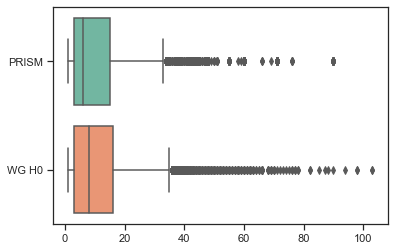

In [174]:
ax = sns.boxplot(data=CompDec, orient="h", palette="Set2")

In [175]:
sns.set(style="white", color_codes=True)

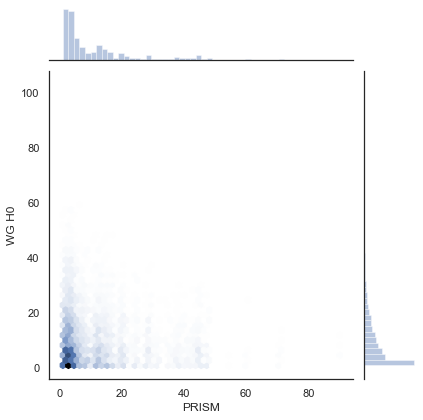

In [176]:
DecG = sns.jointplot(x='PRISM', y='WG H0', data=CompDec, kind="hex")

## Output

In [177]:
AveLister.append( [ PRAllDF['Dry_Count'].mean(), H0DDDF['Dry_Count'].mean() ] )
VarLister.append( [ PRAllDF['Dry_Count'].var(), H0DDDF['Dry_Count'].var() ] )
SkewLister.append( [ PRAllDF['Dry_Count'].skew(), H0DDDF['Dry_Count'].skew() ] )
KurtLister.append( [ PRAllDF['Dry_Count'].kurtosis(), H0DDDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ PRAllDF['Dry_Count'].count(), H0DDDF['Dry_Count'].count() ] )
PLister.append( [ (1.0 - (( PRAllDF['Dry_Count'].var() - PRAllDF['Dry_Count'].mean() ) / 
                            PRAllDF['Dry_Count'].var() ) ),
                  (1.0 - (( H0DDDF['Dry_Count'].var() - H0DDDF['Dry_Count'].mean() ) / 
                            H0DDDF['Dry_Count'].var() ) ) ])
NLister.append( [ ( PRAllDF['Dry_Count'].mean()**2.0 / 
                   ( PRAllDF['Dry_Count'].var() - PRAllDF['Dry_Count'].mean() ) ),
                  ( H0DDDF['Dry_Count'].mean()**2.0 / 
                   ( H0DDDF['Dry_Count'].var() - H0DDDF['Dry_Count'].mean() ) ) ])
MedianLister.append( [ PRAllDF['Dry_Count'].median(), H0DDDF['Dry_Count'].median() ] )
MaxLister.append( [ PRAllDF['Dry_Count'].max(), H0DDDF['Dry_Count'].max() ] )
MinLister.append( [ PRAllDF['Dry_Count'].min(), H0DDDF['Dry_Count'].min() ] )

In [178]:
DataDict = dict()
DataDict["PRISM_Ave"] = np.array( [x[0] for x in AveLister], np.float32 )
DataDict["H0_Ave"] = np.array( [x[1] for x in AveLister], np.float32 )
DataDict["PRISM_Med"] = np.array( [x[0] for x in MedianLister], np.float32 )
DataDict["H0_Med"] = np.array( [x[1] for x in MedianLister], np.float32 )
DataDict["PRISM_Max"] = np.array( [x[0] for x in MaxLister], np.float32 )
DataDict["H0_Max"] = np.array( [x[1] for x in MaxLister], np.float32 )
DataDict["PRISM_Min"] = np.array( [x[0] for x in MinLister], np.float32 )
DataDict["H0_Min"] = np.array( [x[1] for x in MinLister], np.float32 )
DataDict["PRISM_Var"] = np.array( [x[0] for x in VarLister], np.float32 )
DataDict["H0_Var"] = np.array( [x[1] for x in VarLister], np.float32 )
DataDict["PRISM_Skew"] = np.array( [x[0] for x in SkewLister], np.float32 )
DataDict["H0_Skew"] = np.array( [x[1] for x in SkewLister], np.float32 )
DataDict["PRISM_Kurt"] = np.array( [x[0] for x in KurtLister], np.float32 )
DataDict["H0_Kurt"] = np.array( [x[1] for x in KurtLister], np.float32 )
DataDict["PRISM_Cnt"] = np.array( [x[0] for x in CntLister], np.float32 )
DataDict["H0_Cnt"] = np.array( [x[1] for x in CntLister], np.float32 )
DataDict["PRISM_P"] = np.array( [x[0] for x in PLister], np.float32 )
DataDict["H0_P"] = np.array( [x[1] for x in PLister], np.float32 )
DataDict["PRISM_N"] = np.array( [x[0] for x in NLister], np.float32 )
DataDict["H0_N"] = np.array( [x[1] for x in NLister], np.float32 )
SumCompDF = pd.DataFrame( index=MonthLister, data=DataDict )

In [179]:
OutFileFP = os.path.normpath( os.path.join( OUT_DIR, "%s_WG_DryDay_Verification.xlsx" % OUT_ROOT ) )
with pd.ExcelWriter( OutFileFP, engine="openpyxl" ) as writer:
    SumCompDF.to_excel( writer, sheet_name="Summary" )